In [0]:
import numpy as np 
import pandas as pd
import sklearn as linear_model
import matplotlib
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV

In [81]:
from google.colab import files
upload = files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex (4).csv


In [0]:
data = pd.read_csv('Nairobi Office Price Ex.csv')
nominal = ['LOC','FUR', 'WATER','HK_SER']
ordinal = ['AMB', 'PROX_SCH','PROX_ROAD' ,'PROX_MALL']

for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  data[feature]= trans_f



In [0]:
data = pd.concat([pd.get_dummies(data[nominal],prefix='Estate'), data],axis=1)
data.drop(nominal, axis=1, inplace = True)

In [109]:
X =  data.drop("PRICE",1)
y = data["PRICE"]
regressor = LassoCV()
regressor.fit(X,y)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

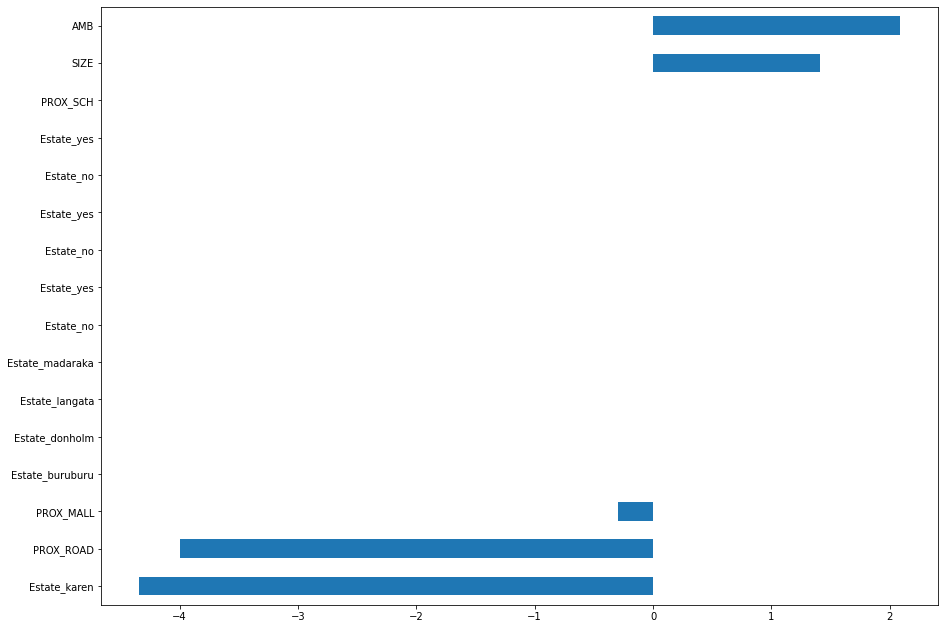

In [108]:
#print(regressor.coef_f)
coef_col = pd.Series(regressor.coef_,index=X.columns)
#print(coef.col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']= (15.00,11.0)
sorted_coef.plot(kind="barh")